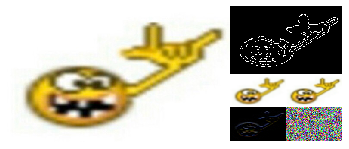

In [36]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random

def show_image(image):
    plt.axis("off")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()  
    
img = cv2.imread('ya_pank_mne_p0x.jpg')
h,w,channels = img.shape

img2 = cv2.resize(img,(w//2, h//2))

edges = cv2.Canny(img2,100,200)
edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)

img3 = cv2.resize(img,(w//4, h//4))

blur = cv2.blur(img3,(5,5))

g_blur = cv2.GaussianBlur(img3,(5,5),0)

creep = cv2.morphologyEx(img3, cv2.MORPH_BLACKHAT, (5,5))

rand = (np.random.rand(h // 4,w // 4, 3) * 255).astype(np.uint8)

res = np.ones((h, w + w // 2, channels), np.uint8) * 255

#some pixels are lost on resizing
res[0:h, 0:w] = img
res[0:h//2, w:w+w//2] = edges
res[h//2:h//2+h//4, w:w+w//4] = blur
res[h//2:h//2+h//4, w+w//4:w+w//2 - 1] = g_blur
res[h//2+h//4:h - 2, w:w+w//4] = creep
res[h//2+h//4:h - 2, w+w//4:w+w//2 - 1] = rand
show_image(res)

